Cargue el archivo unicorn-companies.csv , en el encontramos la información relevante de las Startups convertidas en Unicornios, como nombre, inversores, pais, año de aparición, etc. Realice lo siguiente (preocúpese de la estética):
 * Realice la limpieza de la data, su último recurso debe ser el Drop de datos
 * Como es la distribución de las columnas categoricas?
 * Como es la distribución de las columnas numericas?
 * La cantidad de unicornios fundados a traves del tiempo
 * Cómo ha cambiado con el tiempo la cantidad de empresas que lograron el estatus de unicornio (por país e industria)
 * ¿Qué países tienen las valoraciones más altas de unicornios?
 * ¿Qué industrias tienen la valoración más alta de unicornios?
 * ¿Qué empresas han recaudado la mayor cantidad de dinero?
 * ¿Cómo afecta el recuento de inversores a la valoración?


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import altair as alt
import sys

print ("Pandas",pd.__version__)
print ("Numy",np.__version__)
print ("Seaborn",sbn.__version__)
print ("Altair",alt.__version__)
print ("Python",sys.version[:5])



Pandas 1.3.4
Numy 1.20.3
Seaborn 0.11.2
Altair 4.2.0
Python 3.9.7


 ## 1.- Cargo el archivo 

In [ ]:
df=pd.read_csv("C:/Users/Cristofer/Downloads/Unicorn_Companies.csv")
print ("Dimensiones del archivo", df.shape)
df.head(5)

Dimensiones del archivo (1037, 13)


,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,$7.44B,IPO,28,8,5
1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,$6.874B,None,29,12,None
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010,$2.901B,Asset,39,12,1
3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005,$3.472B,Acquired,56,13,1
4,Epic Games,$42,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991,$4.377B,Acquired,25,5,2


### Información del archivo 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Company            1037 non-null   object
 1   Valuation ($B)     1037 non-null   object
 2   Date Joined        1037 non-null   object
 3   Country            1037 non-null   object
 4   City               1037 non-null   object
 5   Industry           1037 non-null   object
 6   Select Inverstors  1037 non-null   object
 7   Founded Year       1037 non-null   object
 8   Total Raised       1037 non-null   object
 9   Financial Stage    1037 non-null   object
 10  Investors Count    1037 non-null   object
 11  Deal Terms         1037 non-null   object
 12  Portfolio Exits    1037 non-null   object
dtypes: object(13)
memory usage: 105.4+ KB


### 1.2 Descripción de las variables numericas

In [ ]:
df.describe()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
count,1037,1037,1037,1037,1037,1037,1037,1037,1037,1037,1037,1037,1037
unique,1035,200,623,46,256,33,1006,37,914,10,54,16,5
top,Bolt,$1,7/13/2021,United States,San Francisco,Fintech,None,2015,None,None,10,1,None
freq,2,244,9,536,145,205,17,144,24,988,69,280,988


### 1.3 Cantidad de nulos

**Conclusión**  
    No existen nulos

In [ ]:
df.isnull().sum()

Company              0
Valuation ($B)       0
Date Joined          0
Country              0
City                 0
Industry             0
Select Inverstors    0
Founded Year         0
Total Raised         0
Financial Stage      0
Investors Count      0
Deal Terms           0
Portfolio Exits      0
dtype: int64

In [ ]:
print ("En ",df[df["Portfolio Exits"]=="None"].shape[0],"filas esta la palabra None")
df[df["Portfolio Exits"]=="None"]##Estan como None

En  988 filas esta la palabra None


,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,$6.874B,None,29,12,None
5,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",2012,$571.26M,None,26,8,None
6,Checkout.com,$40,5/2/2019,United Kingdom,London,Fintech,"Tiger Global Management, Insight Partners, DST...",2012,$1.83B,None,15,4,None
7,Instacart,$39,12/30/2014,United States,San Francisco,"Supply chain, logistics, & delivery","Khosla Ventures, Kleiner Perkins Caufield & By...",2012,$2.686B,None,29,12,None
8,Databricks,$38,2/5/2019,United States,San Francisco,Data management & analytics,"Andreessen Horowitz, New Enterprise Associates...",2013,$3.497B,None,29,8,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,Timescale,$1,2/22/2022,United States,New York,Internet software & services,"New Enterprise Associates, Benchmark, Two Sigm...",2015,$181.06M,None,7,2,None
1033,Scalapay,$1,2/23/2022,Italy,Milan,Fintech,"Fasanara Capital, Tiger Global Management, Bal...",2019,$700M,None,10,2,None
1034,Omada Health,$1,2/23/2022,United States,San Francisco,Health,"U.S. Venture Partners, dRx Capital, Andreessen...",2011,$449.72M,None,30,6,None
1035,BlueVoyant,$1,2/23/2022,United States,New York,Cybersecurity,"8VC, Liberty Strategic Capital, Eden Global Pa...",2017,$525.5M,None,6,2,None


In [ ]:
list(df.columns)
columnas=[]
for i in range(len(list(df.columns))):
    if df[df[df.columns[i]]=="None"].shape[0]>0:
        print("La columna:",df.columns[i],"tiene", df[df[df.columns[i]]=="None"].shape[0],"valores nulos y cantidad de variables unicas", len(df[df.columns[i]].unique()))
        columnas.append(df.columns[i])
    

La columna: Select Inverstors tiene 17 valores nulos y cantidad de variables unicas 1006
La columna: Founded Year tiene 43 valores nulos y cantidad de variables unicas 37
La columna: Total Raised tiene 24 valores nulos y cantidad de variables unicas 914
La columna: Financial Stage tiene 988 valores nulos y cantidad de variables unicas 10
La columna: Investors Count tiene 1 valores nulos y cantidad de variables unicas 54
La columna: Deal Terms tiene 29 valores nulos y cantidad de variables unicas 16
La columna: Portfolio Exits tiene 988 valores nulos y cantidad de variables unicas 5


**Trabajare con Fincancial Stage y Portafolio Exits**

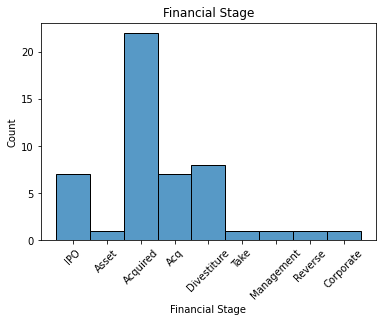

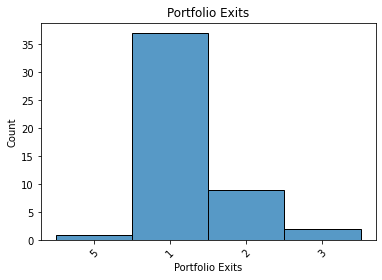

In [ ]:
columnas=[ 'Financial Stage','Portfolio Exits']
for i in range(len(columnas)):
    sbn.histplot(df[df[columnas[i]]!="None"][columnas[i]])
    plt.xticks(rotation=45)
    plt.title(columnas[i])
    plt.show()

In [ ]:
df[columnas[0]][df[columnas[0]]=="None"]="Acquired"
df[columnas[1]][df[columnas[1]]=="None"]="1"

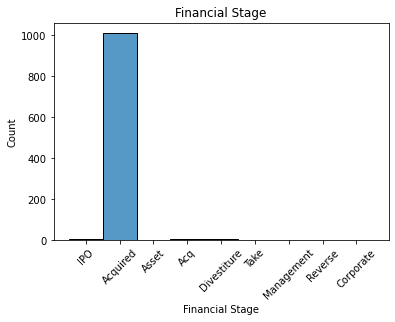

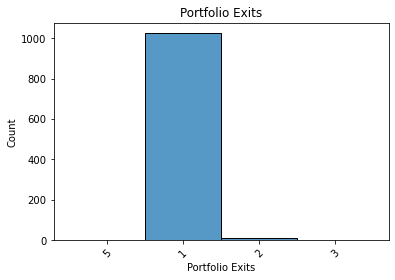

In [ ]:
for i in range(len(columnas)):
    sbn.histplot(df[df[columnas[i]]!="None"][columnas[i]])
    plt.xticks(rotation=45)
    plt.title(columnas[i])
    plt.show()

## En honor al tiempo trabajo reemplazado, hubiera sido mejor forma completar campos por variables uniforme?

In [ ]:
for i in range(len(list(df.columns))):
    df=df[df[df.columns[i]]!="None"]
print ("Se eliminan",1037-df.shape[0])
df.head(2)

Se eliminan 91


,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,$7.44B,IPO,28,8,5
1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,$6.874B,Acquired,29,12,1


### 1.4 Verificación de duplicados

In [ ]:
print ("La cantidad de duplicados es: ",df.shape[0]-df.drop_duplicates().shape[0])
df.drop_duplicates().tail(2)

La cantidad de duplicados es:  0


,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
1035,BlueVoyant,$1,2/23/2022,United States,New York,Cybersecurity,"8VC, Liberty Strategic Capital, Eden Global Pa...",2017,$525.5M,Acquired,6,2,1
1036,Veev,$1,2/24/2022,United States,San Mateo,Internet software & services,"Zeev Ventures, Bond, Fifth Wall Ventures",2008,$604.5M,Acquired,11,1,1


## Tratamiento de data - Cambiaremos el tipo de variable

In [ ]:
df["Valuation ($B)"]=df["Valuation ($B)"].str.replace("$","");
df["Valuation ($B)"]=df["Valuation ($B)"].astype(float)
df["Date Joined"]=pd.to_datetime(df["Date Joined"], format="%m/%d/%Y")
df["Founded Year"]=df["Founded Year"].astype(int)
df["Investors Count"]=df["Investors Count"].astype(int)
df["Deal Terms"]=df["Deal Terms"].astype(int)
df["Portfolio Exits"]=df["Portfolio Exits"].astype(int)

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_12864/165591417.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Valuation ($B)"]=df["Valuation ($B)"].str.replace("$","");


In [ ]:
df["Total Raised"]=df["Total Raised"].str.replace("$","")
for i in range(len(df["Total Raised"])):
    if df["Total Raised"].iloc[i][-1]=="B":
        df["Total Raised"].iloc[i]=df["Total Raised"].iloc[i].replace("B","")
        df["Total Raised"].iloc[i]=float(df["Total Raised"].iloc[i])
        df["Total Raised"].iloc[i]=df["Total Raised"].iloc[i]*1000000
    elif df["Total Raised"].iloc[i][-1]=="M":
        df["Total Raised"].iloc[i]=df["Total Raised"].iloc[i].replace("M","")
        df["Total Raised"].iloc[i]=float(df["Total Raised"].iloc[i])
        df["Total Raised"].iloc[i]=df["Total Raised"].iloc[i]*1
df["Total Raised"]

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_12864/1111337888.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Total Raised"]=df["Total Raised"].str.replace("$","")
C:\Users\Cristofer\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


0       7440000.0
1       6874000.0
2       2901000.0
3       3472000.0
4       4377000.0
          ...    
1032       181.06
1033        700.0
1034       449.72
1035        525.5
1036        604.5
Name: Total Raised, Length: 946, dtype: object

In [ ]:
df=df.rename(columns={"Total Raised":"Total Raised (Millones)"})
df

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised (Millones),Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,7440000.0,IPO,28,8,5
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,6874000.0,Acquired,29,12,1
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010,2901000.0,Asset,39,12,1
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005,3472000.0,Acquired,56,13,1
4,Epic Games,42.0,2018-10-26,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991,4377000.0,Acquired,25,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,Timescale,1.0,2022-02-22,United States,New York,Internet software & services,"New Enterprise Associates, Benchmark, Two Sigm...",2015,181.06,Acquired,7,2,1
1033,Scalapay,1.0,2022-02-23,Italy,Milan,Fintech,"Fasanara Capital, Tiger Global Management, Bal...",2019,700.0,Acquired,10,2,1
1034,Omada Health,1.0,2022-02-23,United States,San Francisco,Health,"U.S. Venture Partners, dRx Capital, Andreessen...",2011,449.72,Acquired,30,6,1
1035,BlueVoyant,1.0,2022-02-23,United States,New York,Cybersecurity,"8VC, Liberty Strategic Capital, Eden Global Pa...",2017,525.5,Acquired,6,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 946 entries, 0 to 1036
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Company                  946 non-null    object        
 1   Valuation ($B)           946 non-null    float64       
 2   Date Joined              946 non-null    datetime64[ns]
 3   Country                  946 non-null    object        
 4   City                     946 non-null    object        
 5   Industry                 946 non-null    object        
 6   Select Inverstors        946 non-null    object        
 7   Founded Year             946 non-null    int32         
 8   Total Raised (Millones)  946 non-null    object        
 9   Financial Stage          946 non-null    object        
 10  Investors Count          946 non-null    int32         
 11  Deal Terms               946 non-null    int32         
 12  Portfolio Exits          946 non-nu

## PREGUNTAS

#### Como es la distribución de las columnas categoricas?

In [ ]:
data=pd.DataFrame(df.dtypes)#[0]=="object"
data[data[0]=="object"]
#for i in range(data[data[0]=="object"].shape[0]):
 #   sbn.histplot(df[data[data[0]=="object"].index[i]]);

,0
Company,object
Country,object
City,object
Industry,object
Select Inverstors,object
Total Raised (Millones),object
Financial Stage,object


**Como es la distribución de las columnas numericas?**

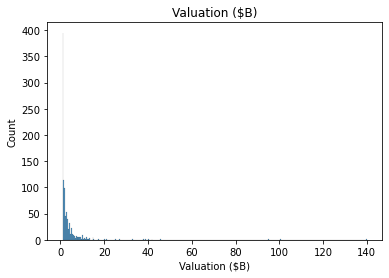

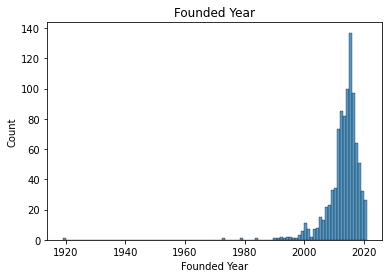

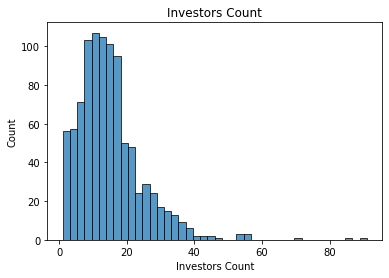

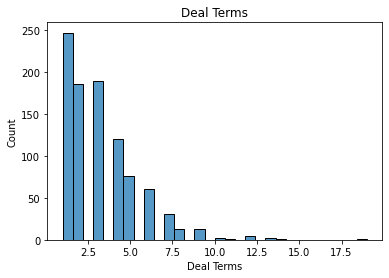

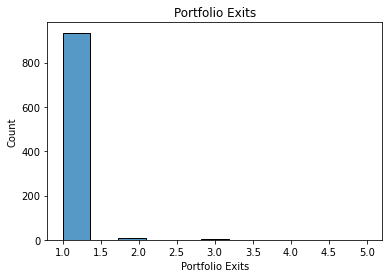

In [ ]:
for i in range(data[(data[0]=="int32") |(data[0]=="float64")  ].shape[0]):
    sbn.histplot(df[data[(data[0]=="int32") |(data[0]=="float64") ].index[i]]);
    plt.title(data[(data[0]=="int32") |(data[0]=="float64") ].index[i])
    plt.show()

**La cantidad de unicornios fundados a traves del tiempo**

In [ ]:
df_unicornio=pd.DataFrame(df.groupby("Founded Year")["Company"].count())
df_unicornio.tail(2)
df_unicornio=df_unicornio.reset_index()
df_unicornio.sort_values("Company",ascending=False, inplace=True)

In [ ]:
import altair as alt
multi= alt.selection_multi()
click = alt.selection_multi(encodings=['color'])
chart =alt.Chart(df_unicornio).mark_point().encode(
    x=alt.X('Founded Year:N'),
    y=alt.Y('Company:N',sort=alt.SortField(field="Company",order='descending')),
    tooltip=["Founded Year","Company"],
).properties(selection=multi , width=500,height=300)
chart

alt.Chart(...)

**Cómo ha cambiado con el tiempo la cantidad de empresas que lograron el estatus de unicornio (por país e industria)**

In [ ]:
df_pais=pd.DataFrame(df.groupby(["Country","Industry","Founded Year"]).count()["Company"])
df_pais.Company.value_counts()
df_pais=df_pais[df_pais["Company"]>0]
df_pais=df_pais.reset_index()
df_pais

,Country,Industry,Founded Year,Company
0,Argentina,Fintech,2017,1
1,Australia,E-commerce & direct-to-consumer,2011,1
2,Australia,Fintech,2015,1
3,Australia,Internet software & services,2004,1
4,Australia,Internet software & services,2011,1
...,...,...,...,...
505,United States,"Supply chain, logistics, & delivery",2017,1
506,United States,"Supply chain, logistics, & delivery",2018,1
507,United States,Travel,2015,1
508,Vietnam,Fintech,2013,1


In [ ]:
multi= alt.selection_multi()
click = alt.selection_multi(encodings=['color'])
import altair_viewer
alt.renderers.enable('altair_viewer')

for i in range (len(list(df_pais["Country"].unique()))):
    df_pais2=df_pais[df_pais["Country"]==list(df_pais["Country"].unique())[i]]
    chart =alt.Chart(df_pais2, title=list(df_pais["Country"].unique())[i]).mark_point().encode(
        x=alt.X('Founded Year:N'),
        y=alt.Y('Company:N',sort=alt.SortField(field="Company",order='descending')),
         shape="Industry",
        tooltip=["Founded Year","Company"],
        color=alt.condition(multi,"Industry",alt.value("lightgray"))
    ).properties(selection=multi , width=500,height=300)
    altair_viewer.display(chart, inline=True)

**¿Qué países tienen las valoraciones más altas de unicornios?**

In [ ]:
pd.DataFrame(df.groupby("Country").sum()["Valuation ($B)"]).sort_values("Valuation ($B)", ascending=False)

,Valuation ($B)
Country,
United States,1751.25
China,525.97
India,175.54
United Kingdom,164.43
Germany,64.50
Sweden,60.52
Australia,50.60
France,48.49
Canada,44.88


**¿Qué industrias tienen la valoración más alta de unicornios?**

In [ ]:
pd.DataFrame(df.groupby("Industry").agg(['sum','count']))["Valuation ($B)"].sort_values("sum", ascending=False)

,sum,count
Industry,,
Fintech,747.16,188
Internet software & services,529.25,179
E-commerce & direct-to-consumer,311.85,100
Artificial intelligence,286.68,65
Other,259.20,52
Health,174.15,65
"Supply chain, logistics, & delivery",168.23,52
Data management & analytics,131.49,39
Cybersecurity,121.70,48


**¿Qué empresas han recaudado la mayor cantidad de dinero?**

In [ ]:
df["Total Raised (Millones)"]=df["Total Raised (Millones)"].astype(float)

In [ ]:
pd.DataFrame(df.groupby("Company").sum()["Total Raised (Millones)"]).sort_values("Total Raised (Millones)", ascending=False)

,Total Raised (Millones)
Company,
Bytedance,7440000.00
SpaceX,6874000.00
Global Switch,6255000.00
Northvolt,6162000.00
WM Motor,5987000.00
...,...
Manner,11.54
Workhuman,11.30
Thirty Madison,8.00


In [ ]:
df_valorización=df[["Investors Count","Valuation ($B)"]]

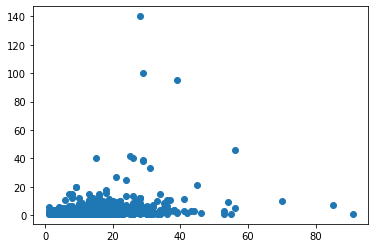

In [ ]:
plt.scatter(df["Investors Count"],df["Valuation ($B)"]);